<a href="https://colab.research.google.com/github/JaylenLuc/ML_climate_classification/blob/main/kmeansClimate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn


# Per City Data classification Using K means

In [ ]:
#REFERENCED https://github.com/guszejnovdavid/City_Climate

import numpy as np
import pandas as pd
from tabulate import tabulate
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
# def percentile_scaler(arr, percentile_low = 10, percentile_high = 90, axis=0):
#     low = np.nanpercentile(arr, percentile_low, axis = axis)
#     median = np.nanpercentile(arr, 50, axis = axis)
#     high = np.nanpercentile(arr, percentile_high, axis = axis)
#     scale = high - low
#     return (arr - median)/scale
# from utility_functions import *
sns.set()
%matplotlib inline
worldmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df = pd.read_csv('sample_data/city_climate_dataframe.csv', low_memory=False)
df.set_index('Key',inplace=True)
print(df['Country'].str.contains('China').any())
def dew_point(temp, rh):
    return np.array(np.array(temp) - ((100 - np.array(rh))/5))
#df.fillna(value={'State':''}, inplace=True)
for i in range(1,13):
  #T - ((100 - RH)/5)
  df['Dew Point, month %d'%(i)] = dew_point(df['Average Temperature, month %d'%(i)], df['Average Relative Humidity, month %d'%(i)])

# def apparent_temp(T, RH, vw):
#     return np.array(mpcalc.apparent_temperature(np.array(T) * units.degC, np.array(RH) * units.percent, np.array(vw) * units.kilometer / (units.hour), mask_undefined = False ))
# for i in range(1,13):
#     df['Apparent Temperature, month %d'%(i)] = apparent_temp(df['Average Temperature, month %d'%(i)],\
#                                                              df['Average Relative Humidity, month %d'%(i)],\
#                                                              df['Average Wind Speed, month %d'%(i)])
print(len(df.index))
def percentile_scaler(arr, percentile_low = 5, percentile_high = 95, axis=0):
    low = np.nanpercentile(arr, percentile_low, axis = axis)
    median = np.nanpercentile(arr, 50, axis = axis)
    high = np.nanpercentile(arr, percentile_high, axis = axis)
    scale = high - low
    return (arr - median)/scale
df_copy = df.copy()

df.drop(['City', 'State', 'Country', 'Region', 'Latitude', 'Longitude'], axis=1, inplace=True) #'Latitude', 'Longitude'
df = percentile_scaler(df)


df.head()

<ipython-input-95-fd7eb887095a>:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


True
14343


Elevation  Average Temperature, month 1  \
Key                                                                      
Afghanistan/'Alaqahdari Dishu   0.245324                     -0.031477   
Afghanistan/Aibak               0.464928                     -0.251816   
Afghanistan/Anar Darah          0.355216                     -0.099274   
Afghanistan/Andkhoy             0.074820                     -0.154964   
Afghanistan/Arghestan           0.637770                     -0.133172   

                               Average Temperature, month 2  \
Key                                                           
Afghanistan/'Alaqahdari Dishu                      0.009828   
Afghanistan/Aibak                                 -0.240786   
Afghanistan/Anar Darah                            -0.073710   
Afghanistan/Andkhoy                               -0.135135   
Afghanistan/Arghestan                             -0.110565   

                               Average Temperature, month 3  \
Key                                                           
Afghanistan/'Alaqahdari Dishu                      0.111111   
Afghanistan/Aibak                                 -0.185185   
Afghanistan/Anar Darah                             0.000000   
Afghanistan/Andkhoy                               -0.071225   
Afghanistan/Arghestan                             -0.037037   

                               Average Temperature, month 4  \
Key                                                           
Afghanistan/'Alaqahdari Dishu                      0.249110   
Afghanistan/Aibak                                 -0.117438   
Afghanistan/Anar Darah                             0.092527   
Afghanistan/Andkhoy                                0.035587   
Afghanistan/Arghestan                              0.049822   

                               Average Temperature, month 5  \
Key                                                           
Afghanistan/'Alaqahdari Dishu                      0.384280   
Afghanistan/Aibak                                 -0.074236   
Afghanistan/Anar Darah                             0.187773   
Afghanistan/Andkhoy                                0.131004   
Afghanistan/Arghestan                              0.117904   

                               Average Temperature, month 6  \
Key                                                           
Afghanistan/'Alaqahdari Dishu                      0.560846   
Afghanistan/Aibak                                  0.058201   
Afghanistan/Anar Darah                             0.354497   
Afghanistan/Andkhoy                                0.269841   
Afghanistan/Arghestan                              0.238095   

                               Average Temperature, month 7  \
Key                                                           
Afghanistan/'Alaqahdari Dishu                       0.63125   
Afghanistan/Aibak                                   0.11250   
Afghanistan/Anar Darah                              0.42500   
Afghanistan/Andkhoy                                 0.34375   
Afghanistan/Arghestan                               0.30000   

                               Average Temperature, month 8  \
Key                                                           
Afghanistan/'Alaqahdari Dishu                      0.521739   
Afghanistan/Aibak                                  0.049690   
Afghanistan/Anar Darah                             0.316770   
Afghanistan/Andkhoy                                0.229814   
Afghanistan/Arghestan                              0.217391   

                               Average Temperature, month 9  ...  \
Key                                                          ...   
Afghanistan/'Alaqahdari Dishu                      0.291667  ...   
Afghanistan/Aibak                                 -0.088542  ...   
Afghanistan/Anar Darah                             0.140625  ...   
Afghanistan/Andkhoy                                0.052083  ...   
Afghanista

In [ ]:
#adding weighting

dewpointkeys = ['Dew Point, month %d'%(i) for i in range(1,13)]
avg_temp_keys = ['Average Temperature, month %d'%(i) for i in range(1,13)]
avg_prec_keys = ['Average Precipitation, month %d'%(i) for i in range(1,13)]
avg_humid_keys = ['Average Relative Humidity, month %d'%(i) for i in range(1,13)]
num_of_days_keys = [key for key in df_copy.columns if 'Number of Days' in key]
daytime_keys = [key for key in df.columns if ( ('Morning' in key) or ('Evening' in key))]
df.drop(daytime_keys, axis=1, inplace=True) #we are already using the daily averages
df[num_of_days_keys] *= 0.05
df[dewpointkeys] *= 3
df[avg_prec_keys] *= 5
df[avg_temp_keys] *= 5
df_copy.head()

City State      Country Region  \
Key                                                                          
Afghanistan/'Alaqahdari Dishu  'Alaqahdari Dishu   NaN  Afghanistan   Asia   
Afghanistan/Aibak                          Aibak   NaN  Afghanistan   Asia   
Afghanistan/Anar Darah                Anar Darah   NaN  Afghanistan   Asia   
Afghanistan/Andkhoy                      Andkhoy   NaN  Afghanistan   Asia   
Afghanistan/Arghestan                  Arghestan   NaN  Afghanistan   Asia   

                                Latitude  Longitude  Elevation  \
Key                                                              
Afghanistan/'Alaqahdari Dishu  30.432060  63.298019   595.8840   
Afghanistan/Aibak              36.264679  68.015511   968.0448   
Afghanistan/Anar Darah         32.758701  61.653969   782.1168   
Afghanistan/Andkhoy            36.952930  65.123756   306.9336   
Afghanistan/Arghestan          31.559811  66.489258  1260.9576   

                               Average Temperature, month 1  \
Key                                                           
Afghanistan/'Alaqahdari Dishu                           8.7   
Afghanistan/Aibak                                      -0.4   
Afghanistan/Anar Darah                                  5.9   
Afghanistan/Andkhoy                                     3.6   
Afghanistan/Arghestan                                   4.5   

                               Average Temperature, month 2  \
Key                                                           
Afghanistan/'Alaqahdari Dishu                          11.8   
Afghanistan/Aibak                                       1.6   
Afghanistan/Anar Darah                                  8.4   
Afghanistan/Andkhoy                                     5.9   
Afghanistan/Arghestan                                   6.9   

                               Average Temperature, month 3  ...  \
Key                                                          ...   
Afghanistan/'Alaqahdari Dishu                          17.6  ...   
Afghanistan/Aibak                                       7.2  ...   
Afghanistan/Anar Darah                                 13.7  ...   
Afghanistan/Andkhoy                                    11.2  ...   
Afghanistan/Arghestan                                  12.4  ...   

                               Dew Point, month 3  Dew Point, month 4  \
Key                                                                     
Afghanistan/'Alaqahdari Dishu            6.120000           11.360000   
Afghanistan/Aibak                        0.280000            6.220000   
Afghanistan/Anar Darah                   4.340000            9.320000   
Afghanistan/Andkhoy                      4.700000           10.260000   
Afghanistan/Arghestan                    2.059999            6.459999   

                               Dew Point, month 5  Dew Point, month 6  \
Key                                                                     
Afghanistan/'Alaqahdari Dishu               14.98           18.239999   
Afghanistan/Aibak                            8.76           11.100000   
Afghanistan/Anar Darah                      12.12           15.540001   
Afghanistan/Andkhoy                         12.28           14.600000   
Afghanistan/Arghestan                        8.96           12.340000   

                               Dew Point, month 7  Dew Point, month 8  \
Key                                                                     
Afghanistan/'Alaqahdari Dishu           19.579999           17.640001   
Afghanistan/Aibak                       12.880000           11.400000   
Afghanistan/Anar Darah                  17.000000           15.159999   
Afghanistan/Andkhoy                     16.340001           14.440000   
Afghanistan/Arghestan                   15.180000           13.599999   

                               Dew Point, month 9  Dew Point, month 10  \
Key                                                            

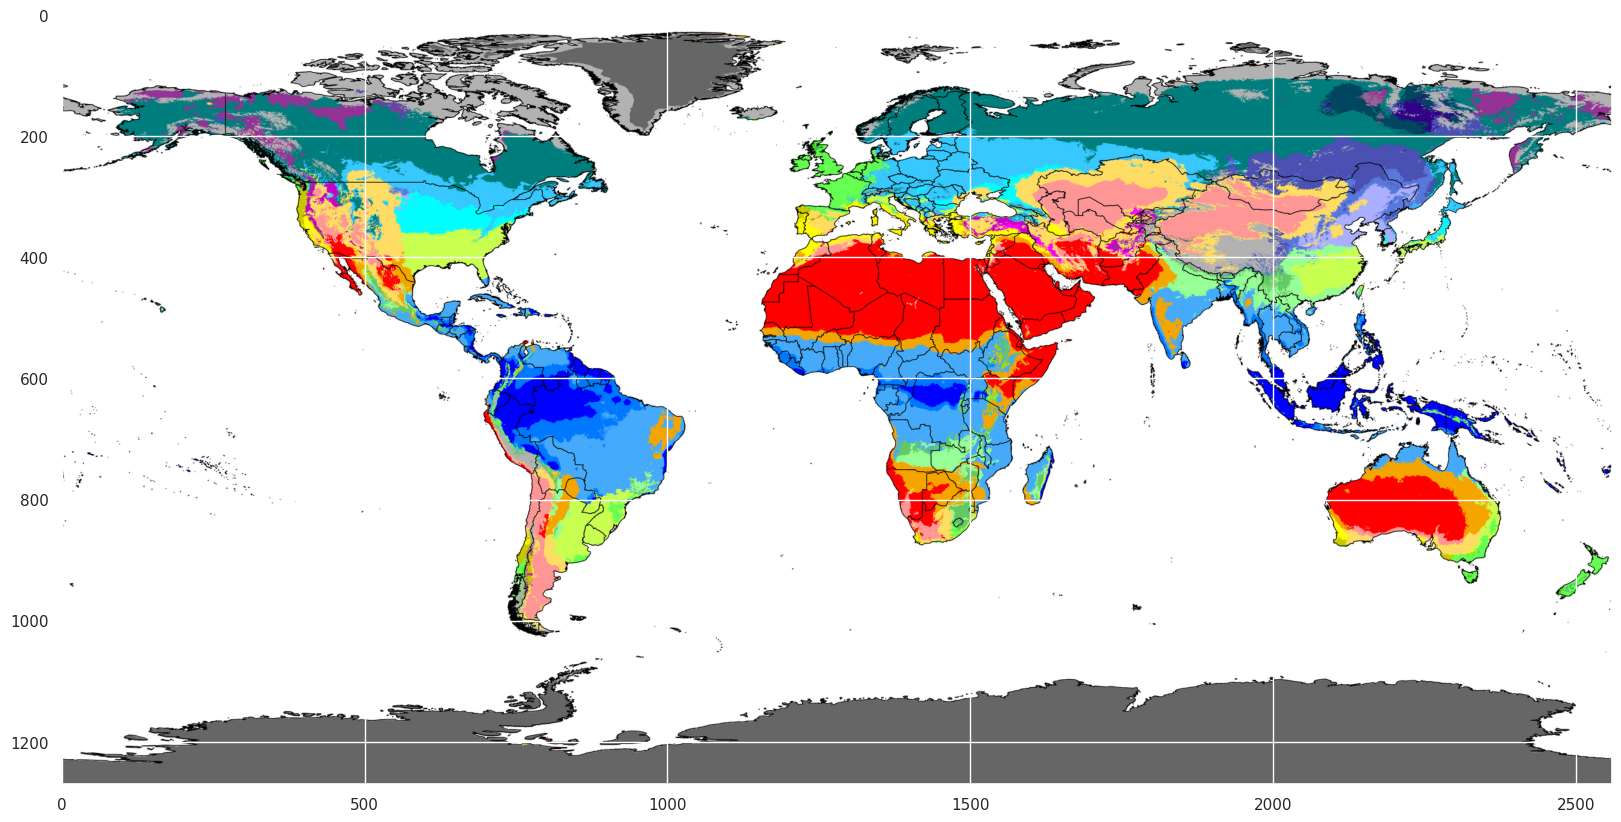

In [ ]:
X_fit = df.dropna(axis=1)
# X_fit.head()
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
fig, ax = plt.subplots(figsize=(20, 10))
koppen_map = plt.imread("sample_data/Koppen-Geiger_Climate_Classification_Map.png");
ax.imshow(koppen_map);


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


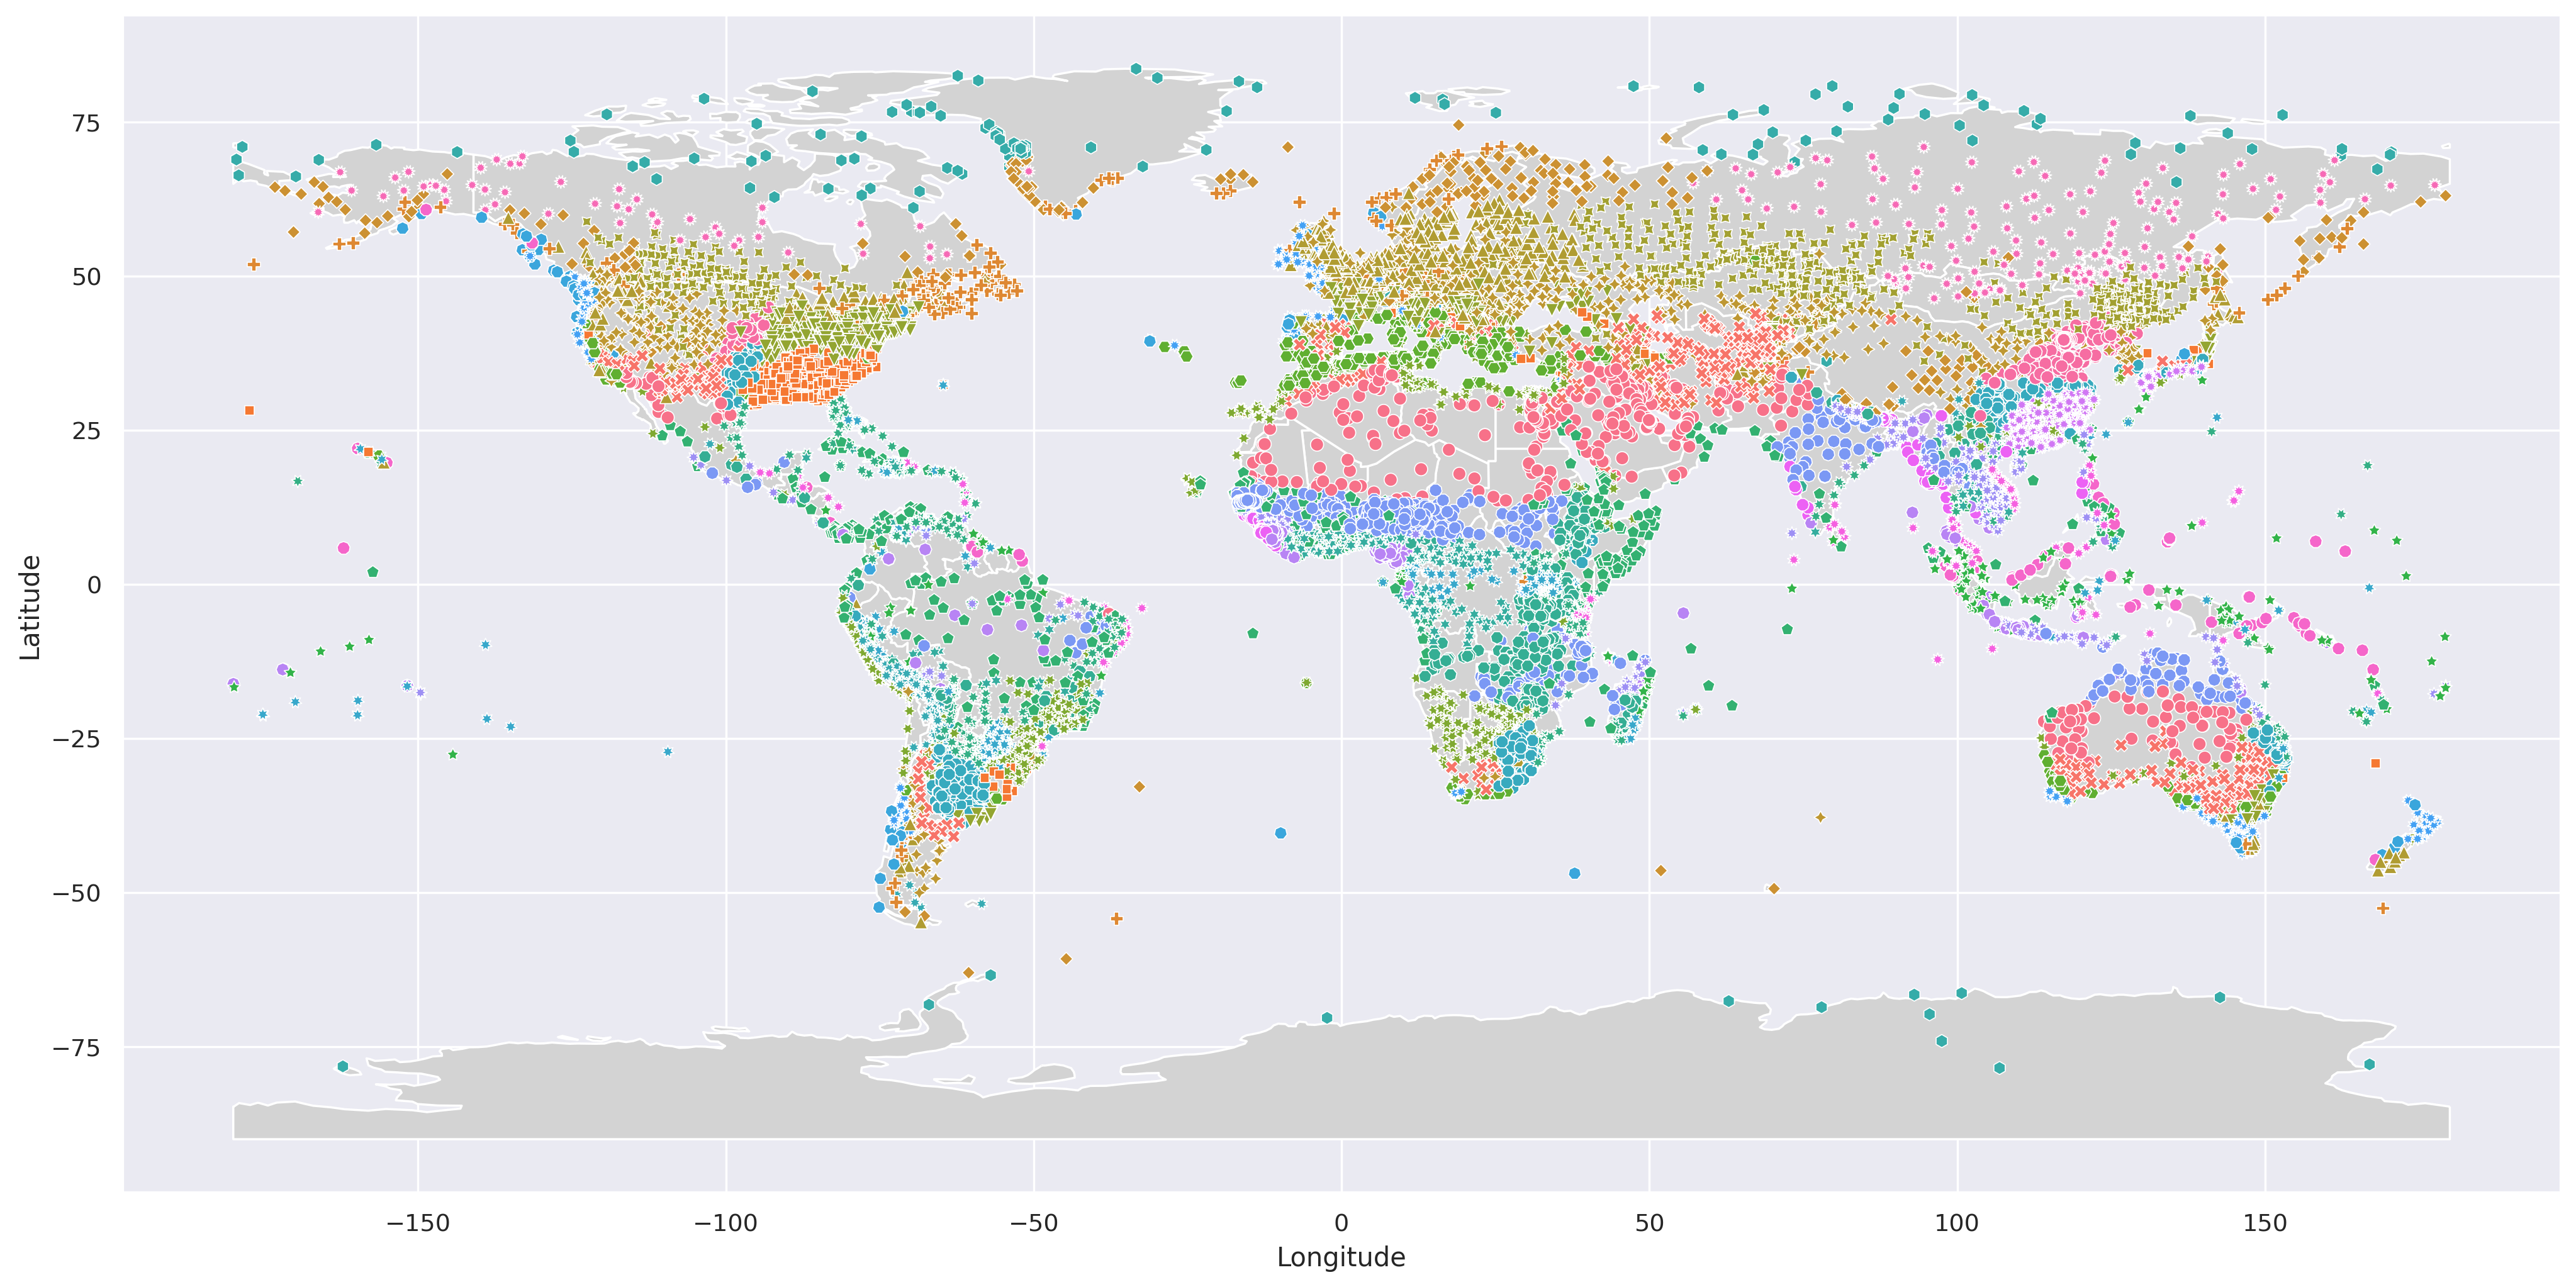

In [ ]:
n_clusters = 31
cl =KMeans(n_clusters=n_clusters, random_state=137).fit(X_fit)
fig, ax = plt.subplots(figsize=(20, 10),dpi=250)
worldmap.plot(color="lightgrey", ax=ax)
labels = cl.labels_
df_copy['label'] = labels.astype(str)

#print( df_copy['Country'].str.contains('China').any())

# sns.scatterplot(data=df_copy,x='Longitude',y='Latitude',hue='label',style='label', palette=map_to_koppen_colors(df_copy) );
sns.scatterplot(data=df_copy,x='Longitude',y='Latitude',hue='label',style='label' );

plt.legend([],[], frameon=False)
plt.show()

# Per land Segment data classification using Self Organizing


In [ ]:
#now we are using another dataset which deals iwth pixel per pixel rather than per city
import scipy.io
d = scipy.io.loadmat('sample_data/training_set.mat')['t']
data = np.stack(list(d[0:2, 0]))
print(data)

IndexError: index 100 is out of bounds for axis 0 with size 2

City                    Camilo Aldao
State                            NaN
Country                    Argentina
Region                 South America
Latitude                  -33.127449
                           ...      
Dew Point, month 9         16.580001
Dew Point, month 10        13.380001
Dew Point, month 11            10.24
Dew Point, month 12              6.7
label                             21
Name: Argentina/Camilo Aldao, Length: 176, dtype: object
